In [1]:
%%html
<style>
h1 { color: rgb(226, 0, 26); font-size: 190% !important;}
h2 { color: rgb(0, 80, 120); }
.container { width: 70%; font-size: 18px }
#notebook-container{ font-size: 18px; }
.CodeMirror { font-size: 18px; }
table { font-size: 16px !important; }
</style>

# BigData - DBWeather

## 0. Inhaltsverzeichnis


In [1]:
# Test

In [2]:
import pandas as pd

from database import Database

database = Database()

In [3]:
database.mongo_data_train.count_documents(filter={})

7796

In [4]:
for i in database.mongo_data_train.find({"eva": 8000244}).limit(5):
    print(i)

{'_id': ObjectId('6363f393e60c50489303b268'), 'board_type': 'arr', 'con_line': '611', 'con_type': 'ICE', 'eva': 8000244, 'timestamp': '2022-11-03T17:23:00+01:00', 'delay': 56}
{'_id': ObjectId('6363f393e60c50489303b26a'), 'board_type': 'arr', 'con_line': '204', 'con_type': 'ICE', 'eva': 8000244, 'timestamp': '2022-11-03T17:24:00+01:00', 'delay': 38}
{'_id': ObjectId('6363f393e60c50489303b26c'), 'board_type': 'arr', 'con_line': '104', 'con_type': 'ICE', 'eva': 8000244, 'timestamp': '2022-11-03T17:24:00+01:00', 'delay': 38}
{'_id': ObjectId('6363f393e60c50489303b26e'), 'board_type': 'arr', 'con_line': '2', 'con_type': 'S', 'eva': 8000244, 'timestamp': '2022-11-03T17:51:00+01:00', 'delay': 10}
{'_id': ObjectId('6363f393e60c50489303b270'), 'board_type': 'arr', 'con_line': '2011', 'con_type': 'IC', 'eva': 8000244, 'timestamp': '2022-11-03T17:52:00+01:00', 'delay': 10}


<AxesSubplot: xlabel='_id'>

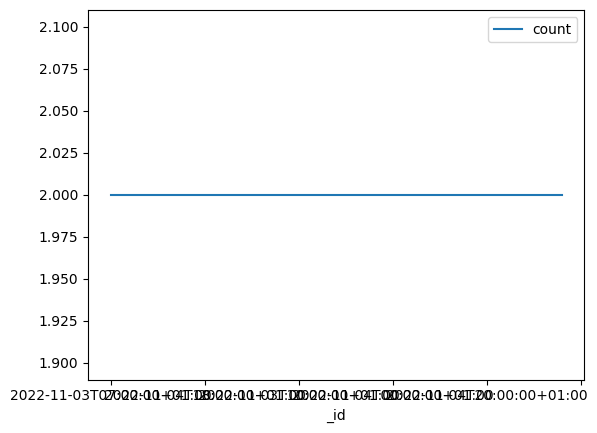

In [31]:
agg_result = database.mongo_data_weather.aggregate([{
    "$group": {
        "_id": "$timestamp",
        "count": {"$sum": 1}
    }
}])
#for i in agg_result:
#    print(i)
weather = pd.DataFrame(list(agg_result))
#weather
weather.plot(x='_id', y='count')

<AxesSubplot: xlabel='_id'>

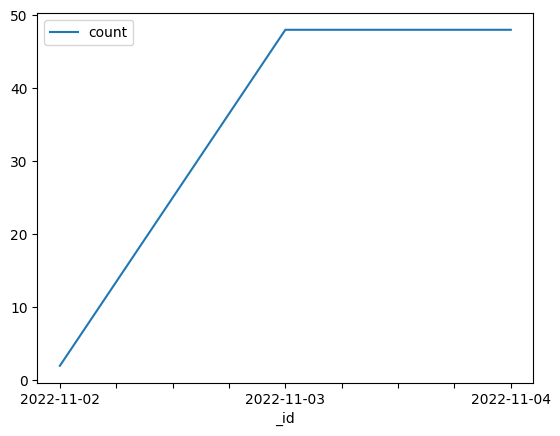

In [34]:
agg_result3 = database.mongo_data_weather.aggregate([
    {
        "$group": {
            "_id": {
                "$dateToString": {
                    "format": "%Y-%m-%d",
                    "date": {"$toDate": "$timestamp"}
                }
            },
            "count": {"$sum": 1}
        }
    },
    {"$sort": {"_id": 1}}
])
#for i in agg_result:
#    print(i)
weather2 = pd.DataFrame(list(agg_result3))
#weather2
weather2.plot(x='_id', y='count')

<AxesSubplot: xlabel='_id'>

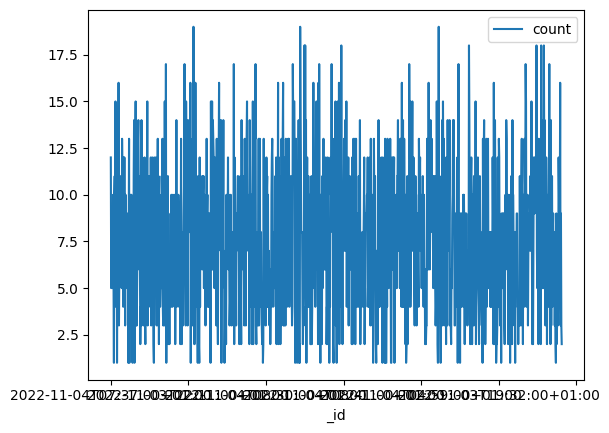

In [19]:
agg_result2 = database.mongo_data_train.aggregate([{
    "$group": {
        "_id": "$timestamp",
        "count": {"$sum": 1}
    }
}])
#for i in agg_result:
#    print(i)
train = pd.DataFrame(list(agg_result2))
#train
train.plot(x='_id', y='count')

<AxesSubplot: xlabel='_id'>

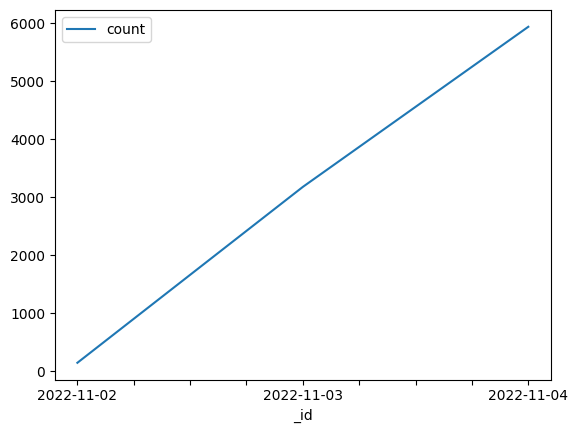

In [36]:
agg_result4 = database.mongo_data_train.aggregate([
    {
        "$group": {
            "_id": {
                "$dateToString": {
                    "format": "%Y-%m-%d",
                    "date": {"$toDate": "$timestamp"}
                }
            },
            "count": {"$sum": 1}
        }
    },
    {"$sort": {"_id": 1}}
])
#for i in agg_result:
#    print(i)
train2 = pd.DataFrame(list(agg_result4))
#train2
train2.plot(x='_id', y='count')

In [38]:
train2

,_id,count
0,2022-11-02,147
1,2022-11-03,3180
2,2022-11-04,5941


In [ ]:
database.close()

In [ ]:
# use https://stackoverflow.com/a/33079582/13777031